<a href="https://colab.research.google.com/github/DaviMoreira27/numerical-calculus/blob/main/Calculo_Numerico_Entrega_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coeficientes do polinômio:
a0 = -0.0012820512820510006, a1 = -0.0021367521367520437, a2 = 0.0023179487179486977, a3 = -0.000367863247863249, a4 = 1.600000000000039e-05

Curvatura máxima ≈ 0.004636 m⁻¹
Ocorre em x = 0.000 m


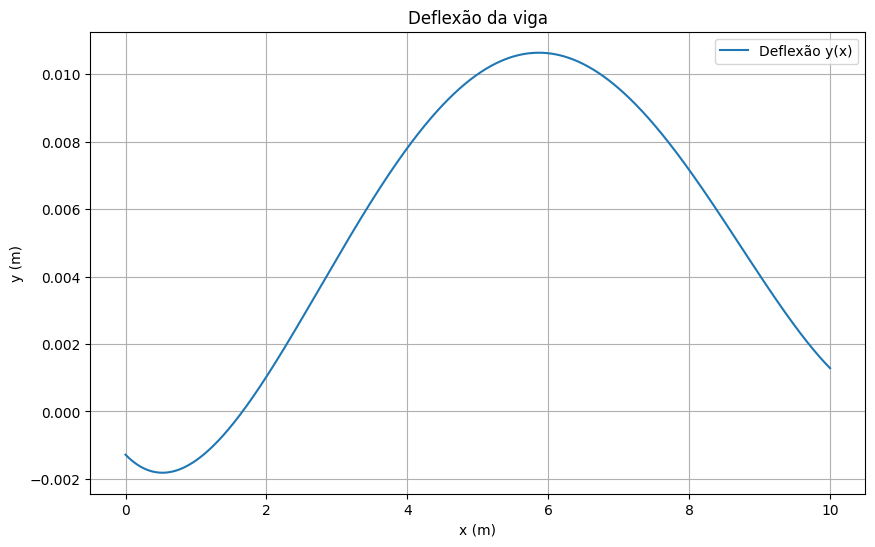

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dados experimentais
x = np.array([0, 5, 10])              # posições em metros
y = np.array([0.0, 0.01, 0.0])        # deflexão em metros (convertido de mm)
dy = np.array([0.0, 0.01, 0.0])       # inclinação (rad)

# Vamos montar o sistema Ax = b
# Usaremos as equações de y(x) e y'(x) para cada ponto

A = []
b = []

for xi, yi, dyi in zip(x, y, dy):
    # Equação de y(x)
    A.append([1, xi, xi**2, xi**3, xi**4])
    b.append(yi)

    # Equação de y'(x)
    A.append([0, 1, 2*xi, 3*xi**2, 4*xi**3])
    b.append(dyi)

A = np.array(A)
b = np.array(b)

# Resolver o sistema linear (mínimos quadrados)
coeffs, *_ = np.linalg.lstsq(A, b, rcond=None)

# Polinômio ajustado
a0, a1, a2, a3, a4 = coeffs
print("Coeficientes do polinômio:")
print(f"a0 = {a0}, a1 = {a1}, a2 = {a2}, a3 = {a3}, a4 = {a4}")

# Derivadas
def y_func(x): return a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4
def y_dd(x): return 2*a2 + 6*a3*x + 12*a4*x**2

# Encontrar ponto de curvatura máxima
x_vals = np.linspace(0, 10, 1000)
curvaturas = y_dd(x_vals)
k_max = np.max(np.abs(curvaturas))
x_max = x_vals[np.argmax(np.abs(curvaturas))]

print(f"\nCurvatura máxima ≈ {k_max:.6f} m⁻¹")
print(f"Ocorre em x = {x_max:.3f} m")

# Plotar
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_func(x_vals), label="Deflexão y(x)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Deflexão da viga")
plt.grid()
plt.legend()
plt.show()
